In [2]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
# !git clone https://github.com/taehojo/data.git

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./0-example/everybody-deeplearning/data/iris3.csv')

In [3]:
# 첫 5줄을 봅니다.
df.head()
# df.iloc[:50,:]
# df.iloc[50:100,:]
# df.iloc[100:150,:]


# dense 층 가장 하단의 output은 Dense(3, activation='softmax')
# model.compile(loss='categorical_crossentropy')
# ===> y값이 원핫인코딩이 되어 있어야 함
# ===> 원핫인코딩이 되어 있지 않다면, loss='sparse_categorical_crossentropy'
df.iloc[:,4].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
X = df.iloc[:, :4]
y = df.iloc[:, 4]

In [5]:
y = pd.get_dummies(y)

In [6]:
import numpy as np
inNum = np.shape(X)[1]
np.shape(X)

(150, 4)

In [7]:
from sklearn.model_selection import train_test_split

# 스플릿 사이즈를 명시하지 않으면 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777)

len(X_train), len(X_test)

(112, 38)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=inNum, activation='relu'))   # relu: wx+b>0 -> wx+b, wx+b<=0 -> 0
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
# 옵티마이저는 어떻게 경사하강법을 사용하지를 정한다 # 최적화하는 속도가 크게 달라진다
# 로스펑션은 손실함수, 목적함수는 오차를 어떤 기준으로 계산하는지?
# 메트릭은 평가 기준
hist = model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
# modelpath="./data/model/iris/{epoch:02d}-{val_accurary:.4f}.hdf5"
modelpath="./data/model/iris/{epoch:02d}-{val_accurary:.4f}.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)   # 디폴트 0

# 모델 실행
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_data=(X_test, y_test), callbacks=[checkpointer])    # 전체 112개를 5개씩 묶어서 23회를 30번 = 총 690회 돈다. adam 작업도 690회 이루어진다.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                60        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
 1/23 [>.............................] - ETA: 7s - loss: 1.1222 - accuracy: 0.4000

KeyError: 'Failed to format this callback filepath: "./data/model/iris/{epoch:02d}-{val_accurary:.4f}.hdf5". Reason: \'val_accurary\''

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


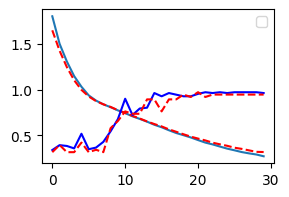

In [ ]:
list(history.history)

import matplotlib.pyplot as plt

plt.figure(figsize=(3,2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r--')
plt.legend(loc='upper right')

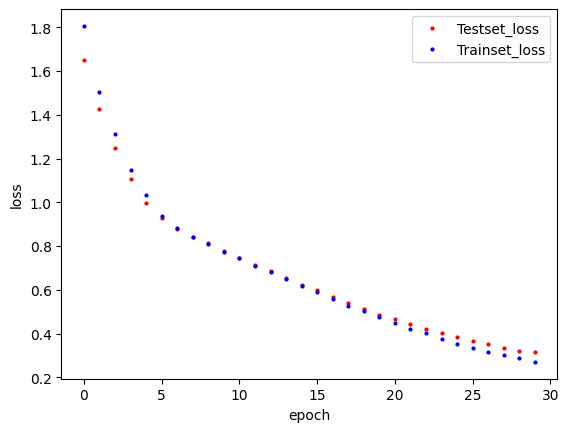

In [ ]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=history.history['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=history.history['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
newX = [[5.2,3.2,1.5,0.3]]
X_train[:3].values
input_newX = np.reshape(newX, (1, -1))
result = model.predict(newX) # 3개의 카테고리의 확률값으로 출력, 다 합치면 1
np.argmax(result)

1/1 [==============================] - 0s 47ms/step


1

In [ ]:
# 모델의 정확도를 구하는 작업
# model.fit 할 때 validation_data로 test를 사용했기 떄문에 model.fit의 최종과 같은 값을 출력
score = model.evaluate(X_test, y_test)
score   # [0]로스, [1]정확도, 에포크의 가장 마지막 자료

2/2 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.9474


[0.31756308674812317, 0.9473684430122375]

In [ ]:
y_test.iloc[0,:]
y_test.values[0]

Iris-setosa        False
Iris-versicolor     True
Iris-virginica     False
Name: 71, dtype: bool

In [ ]:
model.predict(X_test)[:5]

2/2 [==============================] - 0s 2ms/step


array([[0.03522818, 0.7152321 , 0.2495397 ],
       [0.01370706, 0.6583064 , 0.3279865 ],
       [0.02467703, 0.59331995, 0.382003  ],
       [0.00371372, 0.3016078 , 0.6946785 ],
       [0.85305893, 0.08536395, 0.06157713]], dtype=float32)

In [ ]:
# 가장 확률이 높은 친구가 선정
# axis=0이면 열중에 가장 큰 값
np.argmax(model.predict(X_test), axis=1)[:5]

2/2 [==============================] - 0s 996us/step


array([1, 1, 1, 2, 0], dtype=int64)

In [ ]:
# 일일히 예측값과 실제값이 잘 맞았는 지 확인하는 방법
pred_iris = np.argmax(model.predict(X_test), axis=1)
real_iris = np.argmax(y_test, axis=1)
pred_iris[:5], real_iris[:5]

# 오차행렬표
resultDF = pd.DataFrame({'real':real_iris, 'pred':pred_iris, 'ox':real_iris==pred_iris})
resultDF


2/2 [==============================] - 0s 1ms/step


,real,pred,ox
0,1,1,True
1,1,1,True
2,1,1,True
3,1,2,False
4,0,0,True
5,0,0,True
6,0,0,True
7,0,0,True
8,2,2,True
9,2,2,True


In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
conMatrix = confusion_matrix(real_iris, pred_iris).ravel()
pd.DataFrame(conMatrix)

NameError: name 'real_iris' is not defined

In [60]:
# 오차행렬표를 데이터프레임으로 변환 (rywo 388쪽 가장하단)
# 오차행렬표를 데이터프레임으로 작업하지 않고, 차트로 보여주는 모듈도 있음.
cnt=len(conMatrix)
pd.DataFrame(conMatrix, 
             index=['true_%d' % i for i in range(cnt)],
             columns=['pred_%d' % i for i in range(cnt)] )

,pred_0,pred_1,pred_2
true_0,13,0,0
true_1,0,11,2
true_2,0,0,12


Text(58.222222222222214, 0.5, 'true label')

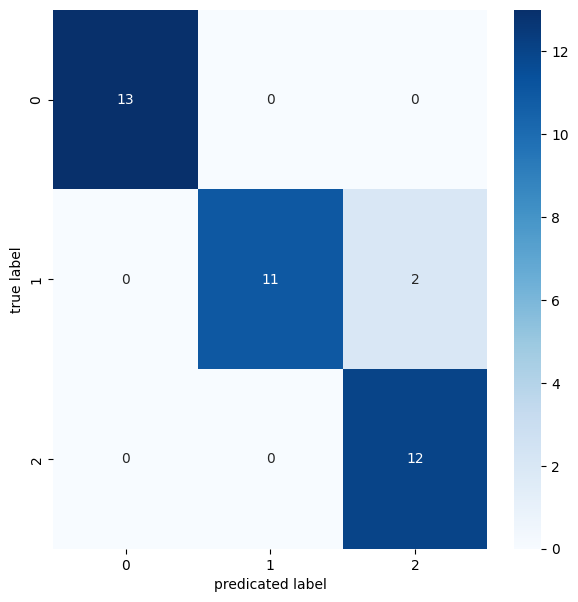

In [61]:
# 오차행렬표를 차트로 보여주는 작업_혼돈행렬
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')

In [67]:
from sklearn.metrics import classification_report
print(classification_report(real_iris, pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [57]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다. 
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

2/2 [==============================] - 0s 997us/step


KeyError: 0